In [ ]:
# Импорт необходимых библиотек
import scipy.stats as sts
import numpy as np
import matplotlib.pyplot as plt
import math

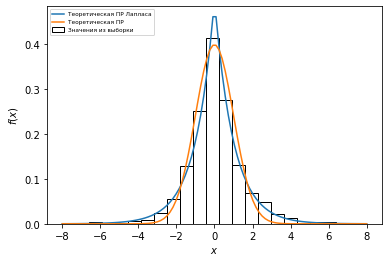

In [ ]:
vyb = sts.laplace().rvs(size=1000) #генерирую выборку объема 1000
x = np.linspace(-8,8,100) #задаю значения на оси x для построения графика
fig, ax = plt.subplots()
ax.plot(x, sts.laplace().pdf(x), label = 'Теоретическая ПР Лапласа') #строю теоретическую плотность распределения Лапласа
ax.plot(x, sts.norm().pdf(x), label = 'Теоретическая ПР') #строю теоретическую плотность нормального распределения 
ax.hist(vyb,bins=20,density=True,color = 'white', edgecolor = 'black', label = 'Значения из выборки') #строю гистограмму выборки
ax.legend(loc = 'upper left',fontsize = 'xx-small')
ax.set_xlabel('$x$')
ax.set_ylabel('$f(x)$')
plt.show() #вывожу график

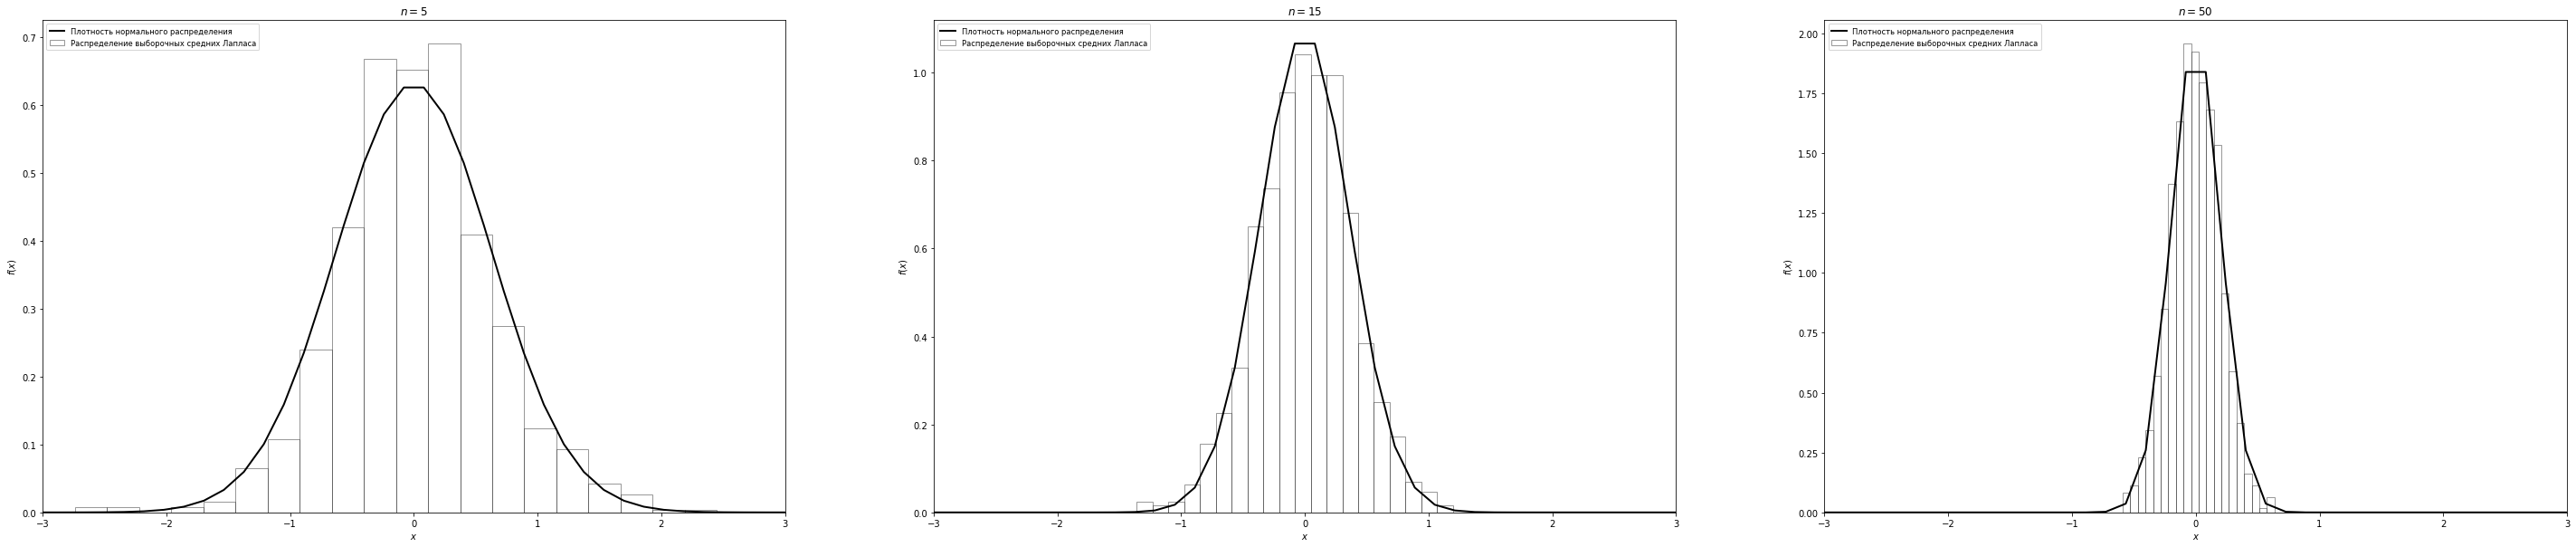

In [ ]:
%matplotlib inline 
mean_all =[] #создаю пустой список
vol = [5,15,50] #создаю список со значениями объема выборки
fig, ax = plt.subplots(1, 3, figsize = (50, 10)) #Команда для вывода 3-х окон с графиками
for n in range(0,3): 
    mean_all.append([np.mean(sts.laplace().rvs(size=vol[n])) for _ in range(1000)]) #генериую 1000 выборок объемом n
    mu = 0 #задаю параметры нормального распределения для моей плотности
    VAR = 2
    SE = math.sqrt(VAR/vol[n])
    ax[n].hist(mean_all[n], density = True, bins = 20, edgecolor = 'black', color = 'white', alpha = 0.4, 
             label = 'Распределение выборочных средних Лапласа') #строю гистограммы распределений выборочных средних
    ax[n].plot(x, sts.norm(mu,SE).pdf(x), linewidth = 2, color = 'black',
             label='Плотность нормального распределения',) #строю теоретическую плотность нормального распределения с подсчитанными параметрами
    ax[n].legend(loc = 'upper left',fontsize = 'small') #добавляю легенды для функции и гистограммы на графиках
    ax[n].set_title('$n = {}$'.format(vol[n])) #добавляю инофрмацию о графиках
    ax[n].set_xlim(-3,3)
    ax[n].set_xlabel('$x$')
    ax[n].set_ylabel('$f(x)$')

plt.show()

In [ ]:
# С ростом n аппроксимация распределения средних значений подвыборок
# нормальным распределением становится более точной